## 🏡 House Prices - Advanced Regression Techniques
- Created a "Feature Analyzer" that gives relevant information and plots to quickly get useful insights about a certain feature, categorical or numerical.
- Did preprocessing with missing values, change data types, ordinal encoding, feature engineering, dummies.
- Used CatBoostRegressor as a model.

Ideas for improving:
more feature engineering,
deal with outliars,
complicate model.

My website: https://aadsm2355.wixsite.com/andryadsm

---
# ⤵️ Importing

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # GridSearchCV
from sklearn.metrics import mean_squared_log_error # make_scorer
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path = Path('/kaggle/input/house-prices-advanced-regression-techniques/')

sns.set()
plt.style.use('dark_background') # Dark mode plots

pd.set_option('display.max_rows', None, 'display.max_columns', None)

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
data_train = pd.read_csv(path/'train.csv')
data_test = pd.read_csv(path/'test.csv')
# data_sample_submission = pd.read_csv(path/'sample_submission.csv')

# with open(path/'data_description.txt', mode='r') as txt:
#     data_description = txt.read()

In [3]:
print(f"Shape of data: {data_train.shape[0]} rows and {data_train.shape[1]} columns\n")
data_train.head(3)

Shape of data: 1460 rows and 81 columns



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


---
# 🔎 **EDA**

In [4]:
# Drop Id column since is of no use
df_train = data_train.drop(columns=['Id'])
df_test = data_test.drop(columns=['Id'])

In [5]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 80 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(34), object(43)
memory usage: 912.6+ KB


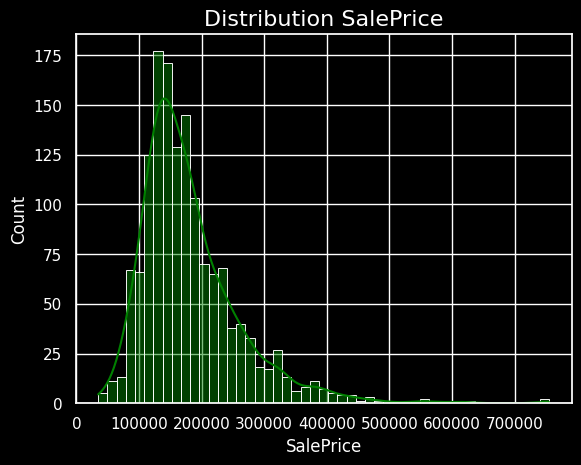

In [6]:
sns.histplot(df_train['SalePrice'], kde=True, color="green")
plt.title("Distribution SalePrice", size=16)
plt.show()

---
## ❌ Missing values

In [7]:
miss_val_train = df_train.isna().sum()[df_train.isna().sum() > 0].sort_values(ascending=False)
miss_val_test = df_test.isna().sum()[df_test.isna().sum() > 0].sort_values(ascending=False)

print(f"Columns with missing values in train data: {miss_val_train.shape[0]}\n\t\t\t       test  data: {miss_val_test.shape[0]}")

Columns with missing values in train data: 19
			       test  data: 33


In [8]:
miss_val = pd.DataFrame([miss_val_train, miss_val_test], index=["train", "test"])
print(f"Missing values in {miss_val.shape[1]} features between train and test sets\n")
miss_val

Missing values in 34 features between train and test sets



,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,Electrical,MSZoning,BsmtFullBath,BsmtHalfBath,Functional,Utilities,GarageCars,GarageArea,TotalBsmtSF,KitchenQual,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,Exterior2nd,Exterior1st,SaleType
train,1453.0,1406.0,1369.0,1179.0,872.0,690.0,259.0,81.0,81.0,81.0,81.0,81.0,38.0,38.0,37.0,37.0,37.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test,1456.0,1408.0,1352.0,1169.0,894.0,730.0,227.0,76.0,78.0,78.0,78.0,78.0,42.0,44.0,42.0,45.0,44.0,15.0,NaN,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
def get_numr_feats(df):
    numr_fts = [ft for ft in df.columns if df[ft].dtype in ['int64', 'float64']]
    return numr_fts

def get_catg_feats(df):
    catg_fts = [ft for ft in df.columns if df[ft].dtype == 'O']
    return catg_fts

In [10]:
numr_feats_miss = [ft for ft in get_numr_feats(df_train) if ft in miss_val.columns]

catg_feats_miss = [ft for ft in get_catg_feats(df_train) if ft in miss_val.columns]

---
## Distribution of Numerical Features

In [11]:
# for ft in get_numr_feats(df_train):
#     sns.histplot(df_train[ft], kde=True, color="green")
#     plt.title(f"Distribution of {ft}", size=20)
#     plt.show()

---
## Numerical Features vs Target Variable

In [12]:
# for ft in get_numr_feats(df_train):
#     sns.scatterplot(x=df_train[ft], y=df_train['SalePrice'], color="green")
#     sns.regplot(x=df_train[ft], y=df_train['SalePrice'], color="red", scatter=False, ci=None)
#     plt.title(f"{ft} vs target", size=20)
#     plt.show()

---
## Categorical Features

In [13]:
# for ft in get_catg_feats(df_train):
#     sns.countplot(x=df_train[ft], color="green")
#     plt.title(f"Count of {ft}", size=20)
#     plt.show()

---
## Correlations

In [14]:
def corr_heatmap(df, figsize=(10, 8), title="Correlation Matrix"):
    plt.figure(figsize=figsize)
    sns.heatmap(df[get_numr_feats(df)].corr(),
                center=0, cmap="coolwarm", square=True)
    plt.title(f"{title}", size=16)
    plt.show()

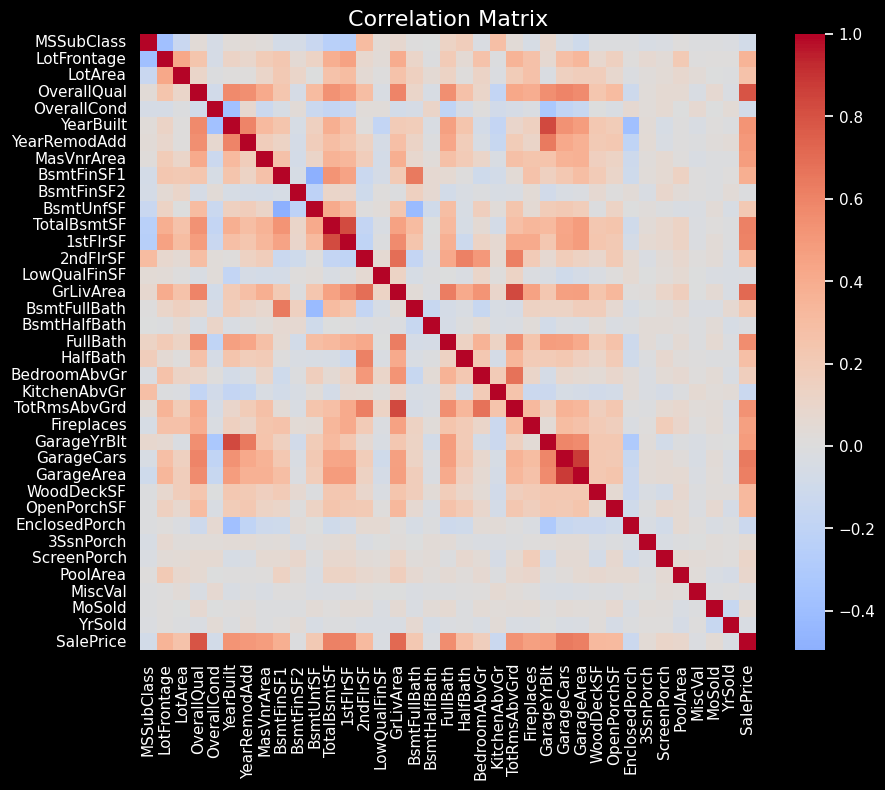

In [15]:
corr_heatmap(df_train)

---
# 📊 Feature Analyzer
- Just input name of feature as a string and df to use, we get info and plots depending if it is categorical or numerical,

In [16]:
def analyze(feature, df):
    print("----------------------------------------")
    
    if df[feature].dtype in ['int64', 'float64']:
        print(f"missing    {df[feature].isna().sum()} - {(df[feature].isna().sum() / df.shape[0] * 100).round(2)}%")
        print(df[feature].describe())
        print("----------------------------------------")
        
        if 'SalePrice' in df.columns:
            fig, axs = plt.subplot_mosaic("AB;CB", figsize=(16, 9), width_ratios=(3, 1))
            plt.suptitle(f"{feature}", size=24)
            plt.subplots_adjust(wspace=0.3, hspace=0.2)
            
            sns.histplot(df[feature], kde=True, color="green", ax=axs['A'])
            axs['A'].label_outer()
            axs['A'].set_title("Distribution", size=16)
              
            sns.heatmap(df[get_numr_feats(df)].corr().loc[feature].to_frame(),
                        center=0, annot=True, fmt='.2f', cmap='coolwarm', ax=axs['B'])
            axs['B'].set_title("Correlations", size=16)
            
            sns.scatterplot(x=df[feature], y=df['SalePrice'], color="green", ax=axs['C'])
            sns.regplot(x=df[feature], y=df['SalePrice'], scatter=False, color="red", ax=axs['C'])
            axs['C'].set_title("vs target", size=16)
        else:
            sns.histplot(df[feature], kde=True, color="green")
            plt.title(f"Distribution of {feature}", size=16)
            
        plt.show()
    if df[feature].dtype == 'O':
        print(f"values    {df[feature].unique()}")
        print(f"missing    {df[feature].isna().sum()} - {(df[feature].isna().sum() / df.shape[0] * 100).round(2)}%")
        print(df[feature].describe())
        print("----------------------------------------")
        
        if 'SalePrice' in df.columns:
            fig, axs = plt.subplots(2, figsize=(16, 9))
            plt.suptitle(f"{feature}", size=24)
            
            sns.countplot(x=df[feature], color="green", ax=axs[0])
            axs[0].bar_label(axs[0].containers[0])
            axs[0].label_outer()
            axs[0].set_title("Count", size=16)
            
            sns.boxplot(x=df[feature], y=df['SalePrice'], color="green", ax=axs[1])
            axs[1].set_title("vs target", size=16)
        else:
            ax = sns.countplot(x=df[feature], color="green")
            ax.bar_label(ax.containers[0])
            plt.title(f"Count of {feature}", size=16)
            
        plt.show()

----------------------------------------
missing    0 - 0.0%
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
----------------------------------------


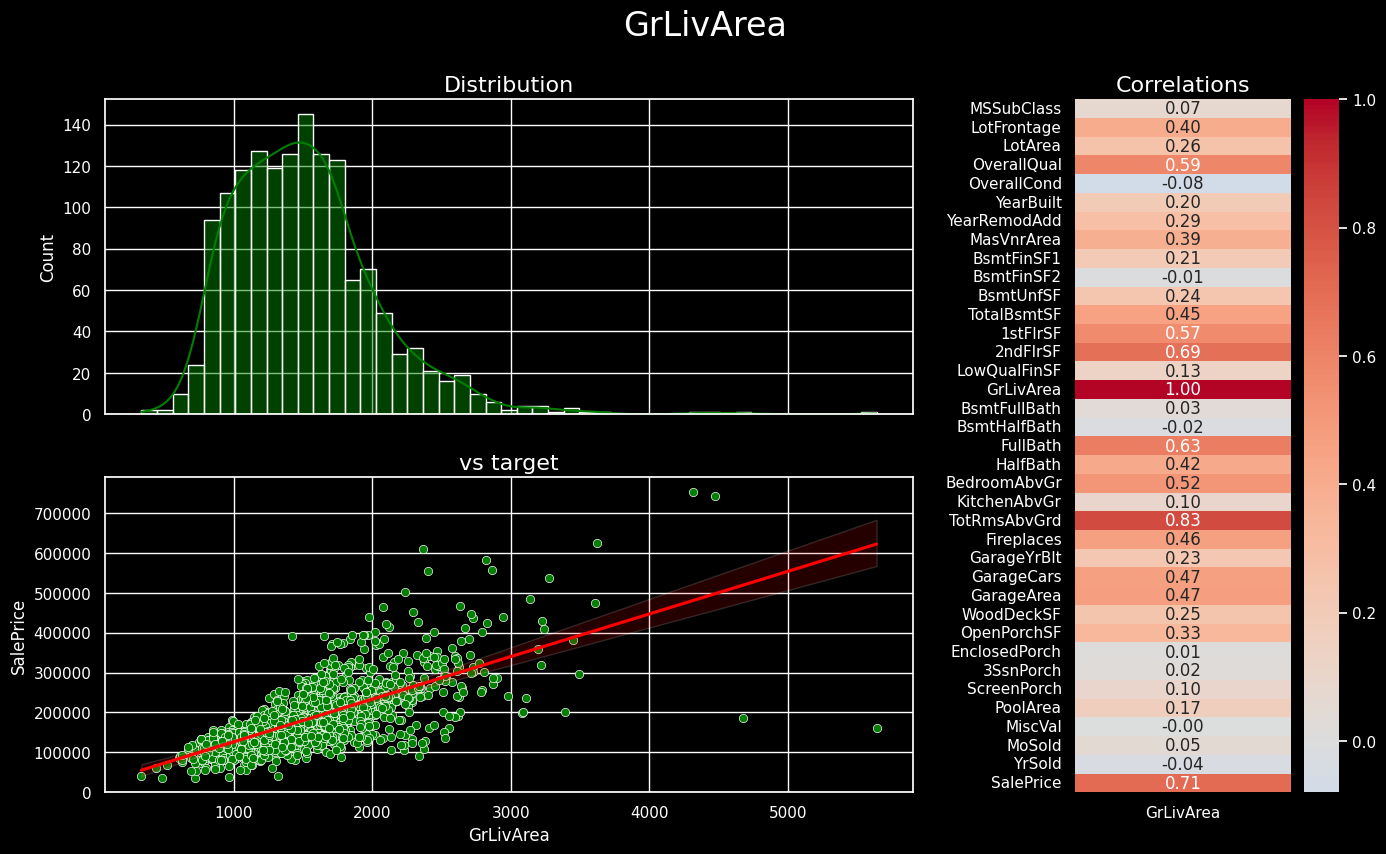

In [17]:
# Analyze numerical feature
analyze('GrLivArea', df_train)

----------------------------------------
values    ['RL' 'RM' 'C (all)' 'FV' 'RH']
missing    0 - 0.0%
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
----------------------------------------


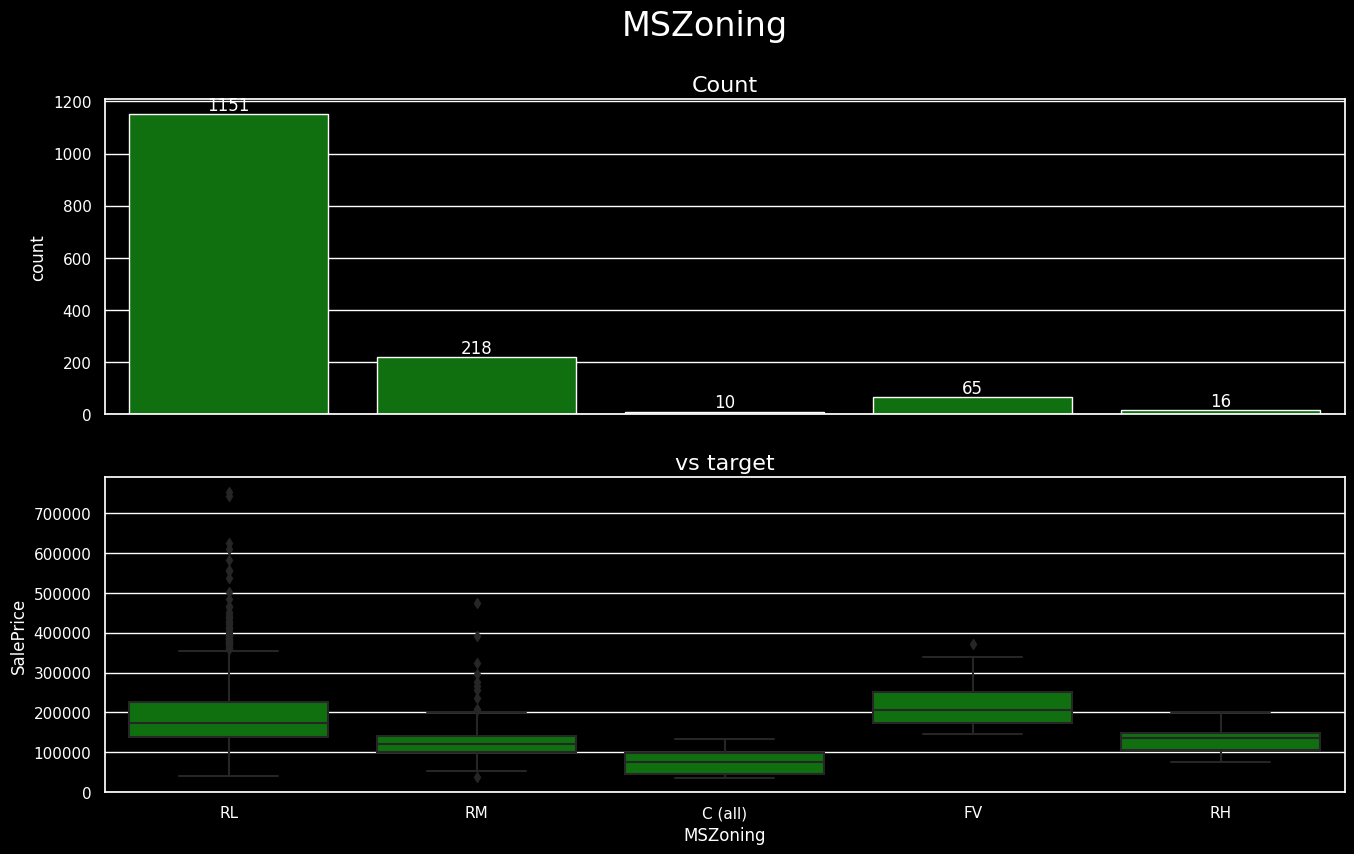

In [18]:
# Analyze categorical feature
analyze('MSZoning', df_train)

---
# 🧹 **Preprocessing**

## Plan:
- Drop columns:
    - Id (not a feature, not usefull)
- Missing values:
    - Numerical: all with median
        - LotFrontage
        - MasVnrArea
        - BsmtFinSF1
        - BsmtFinSF2
        - BsmtUnfSF
        - TotalBsmtSF
        - BsmtFullBath
        - BsmtHalfBath
        - GarageYrBlt
        - GarageCars
        - GarageArea
    - Categorical: 8 with mode, 15 with 'none'
        - MSZoning : mode
        - Alley : 'none'
        - Utilities : mode
        - Exterior1st : mode
        - Exterior2nd : mode
        - MasVnrType : 'none'
        - BsmtQual : 'none'
        - BsmtCond : 'none'
        - BsmtExposure : 'none'
        - BsmtFinType1 : 'none'
        - BsmtFinType2 : 'none'
        - Electrical : mode
        - KitchenQual : mode
        - Functional : mode
        - FireplaceQu : 'none'
        - GarageType : 'none'
        - GarageFinish : 'none'
        - GarageQual : 'none'
        - GarageCond : 'none'
        - PoolQC : 'none'
        - Fence : 'none'
        - MiscFeature : 'none'
        - SaleType : mode
- Change dtype, encode:
    - from numerical to categorical:
        - MSSubClass
    - from categorical ordinal to numerical:
        - ExterQual
        - ExterCond
        - BsmtQual
        - BsmtCond
        - BsmtExposure
        - BsmtFinType1
        - BsmtFinType2
        - HeatingQC
        - KitchenQual
        - FireplaceQu
        - GarageFinish
        - GarageQual
        - GarageCond
        - PoolQC
    - Actually categorical but leave numerical:
        - OverallQual
        - OverallCond
- Feature Engineering
    - Age of house out of YrSold YearBuilt
    - Total SF of house out of TotalBsmtSF, 1stFlrSF, 2ndFlrSF
    - Total number of bathrooms out of BsmtFullBath, BsmtHalfBath, FullBath, HalfBath
    - Total SF area of porch out of OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch
    - Garage overall quality and condition out of GarageQual, GarageCond
    - Exterior overall quality and condition out of ExterQual, ExterCond
    - Basement overall quality and condition out of BsmtQual, BsmtCond
    - Median Total SF of neighborhood out of Neighborhood, TotalSF
    - SF to lot ratio out of TotalSF, LotArea
    - Garage area per car out of GarageArea, GarageCars
- Drop columns used in feature engineering
- Scale features
- Get dummies with train and test together to be easier and match number of features

In [19]:
# List of features to fill with mode
catg_feats_miss_mode = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']
# List of features to fill with 'none'
catg_feats_miss_none = [ft for ft in catg_feats_miss if ft not in catg_feats_miss_mode]

In [20]:
def preprocess(train, test):
    data_prep = [] 
    for df in [train, test]:
#         drop columns
        df = df.drop(columns=['Id'])
        
#         fill missing values
        for ft in numr_feats_miss:
            df[ft] = df[ft].fillna(int(df[ft].median()))
        for ft in catg_feats_miss_mode:
            df[ft] = df[ft].fillna(df[ft].mode()[0])
        for ft in catg_feats_miss_none:
            df[ft] = df[ft].fillna('none')
            
#         Map and Change dtypes
        df['MSSubClass']   = df['MSSubClass']  .astype('O')
        df['ExterQual']    = df['ExterQual']   .map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
        df['ExterCond']    = df['ExterCond']   .map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
        df['BsmtQual']     = df['BsmtQual']    .map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
        df['BsmtCond']     = df['BsmtCond']    .map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
        df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'none': 0})
        df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'none': 0})
        df['BsmtFinType2'] = df['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'none': 0})
        df['HeatingQC']    = df['HeatingQC']   .map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
        df['KitchenQual']  = df['KitchenQual'] .map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
        df['FireplaceQu']  = df['FireplaceQu'] .map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
        df['GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'none': 0})
        df['GarageQual']   = df['GarageQual']  .map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
        df['GarageCond']   = df['GarageCond']  .map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
        df['PoolQC']       = df['PoolQC']      .map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'none': 0})
        df['CentralAir']   = df['CentralAir']  .map({'Y': 1, 'N': 0})
        
#         Feature Engineering
        df['Age'] = df['YrSold'] - df['YearBuilt']
        df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
        df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
        df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
        df['GarageOverall'] = (df['GarageQual'] + df['GarageCond']) / 2
        df['ExterOverall'] = (df['ExterQual'] + df['ExterCond']) / 2
        df['BsmtOverall'] = (df['BsmtQual'] + df['BsmtCond']) / 2
        df["MedNeighTSF"] = df.groupby('Neighborhood')['TotalSF'].transform('median')
        df['SFLotRatio'] = df['TotalSF'] / df['LotArea']
        df['GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']
# ---(
#         df['HasGarage'] = ((df['GarageArea'] > 0) | (df['GarageCars'] > 0)).astype(int)
#         df['HasPool'] = (df['PoolQC'] != 0).astype('int64')
#         df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
#         df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
#         df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
#         df['WasRemod'] = ((df['YearRemodAdd'] - df['YearBuilt']) > 0).astype('int64')
#         df['BsmtFinSFAll'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
#         df['BsmtFinTypeAll'] = (df['BsmtFinType1'] + df['BsmtFinType2']) / 2
# ---)
        df = df.drop(columns=[
                 'YrSold', 'YearBuilt', 
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea',
                 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                 'Neighborhood',
# ---(
#                  'PoolArea', 'PoolQC',
#                  'Fireplaces', 'FireplaceQu',
#                  'GarageYrBlt', 'YearRemodAdd',
#                  'GrLivArea', 'LotArea',
#                  'BsmtFinSF1', 'BsmtFinSF2',
#                  'BsmtFinType1', 'BsmtFinType2',
# ---)
                              ])
        df = df.fillna(0)
        data_prep.append(df)
    train, test = data_prep[0], data_prep[1]
    
#     Scale features
    fts_to_scale = get_numr_feats(test)
    scaler = MinMaxScaler()
    train[fts_to_scale] = scaler.fit_transform(train[fts_to_scale])
    test[fts_to_scale] = scaler.transform(test[fts_to_scale])
    
#     Combine train and test just to get dummies easier and match number of features
    train_test_dummies = pd.concat([train, test])
    train_test_dummies = pd.get_dummies(train_test_dummies, drop_first=True)
    train = train_test_dummies.iloc[:train.shape[0]]
    test = train_test_dummies.iloc[train.shape[0]:].drop(columns=(['SalePrice']))
    
    return train, test

In [21]:
df_train_prepro, df_test_prepro = preprocess(data_train, data_test)

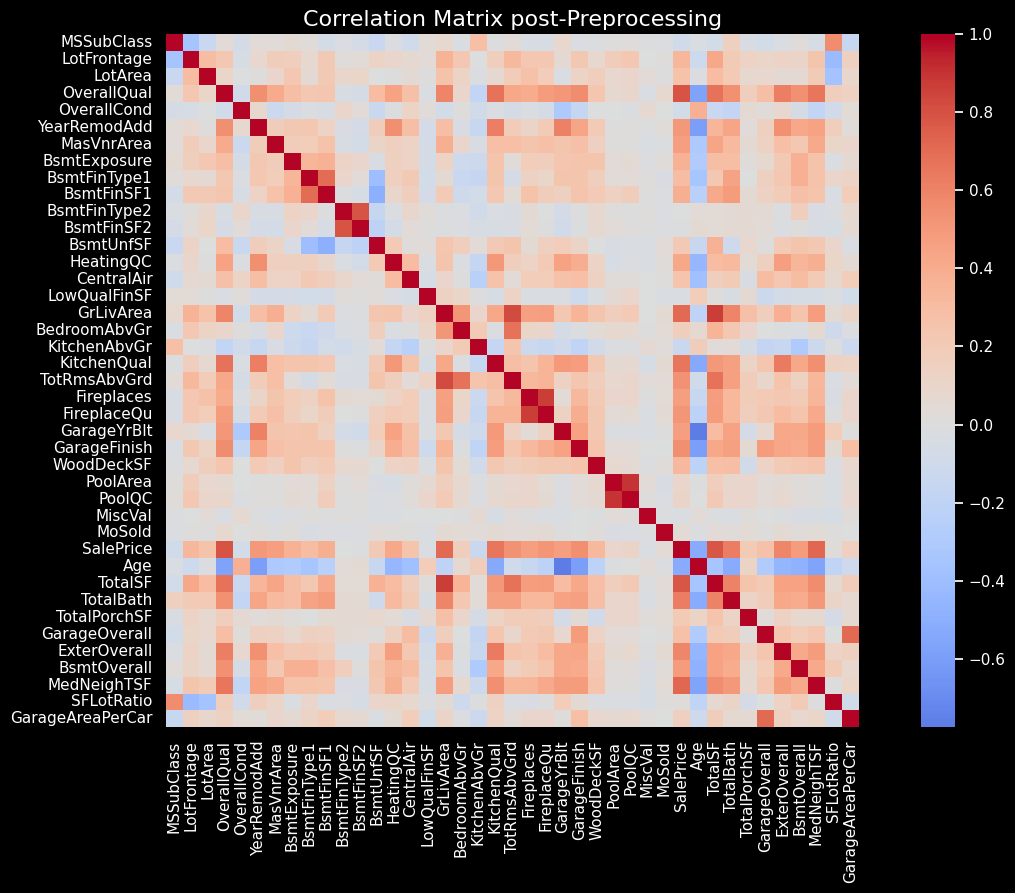

In [22]:
corr_heatmap(df_train_prepro, title="Correlation Matrix post-Preprocessing", figsize=(16, 9))

 ---
# 🤖 **Machine Learning**

---
## 🪵 Simplest model

In [23]:
X = df_train_prepro.drop(columns=['SalePrice'])
y = df_train_prepro['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

model = CatBoostRegressor(random_state=38, verbose=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmsle = mean_squared_log_error(y_test, y_pred, squared=False).round(5)
print(f"Root Mean Squared Error of logs: {rmsle}")

Root Mean Squared Error of logs: 0.12671


---
## 🎛️ GridSearchCV

In [24]:
# model = GradientBoostingRegressor(random_state=38)

# parameters = {'n_estimators': [50, 100, 200, 300, 500],
#               'criterion': ['friedman_mse', 'squared_error'],
#               'max_features': ['sqrt', 'log2'],
#               'ccp_alpha': [0, 0.001, 0.005, 0.01]}

# scoring = make_scorer(mean_squared_log_error, greater_is_better=False, squared=False)

# gscv = GridSearchCV(estimator=model, param_grid=parameters, scoring=scoring)
# gscv.fit(X_train, y_train)

# y_pred = gscv.predict(X_test)
# rmsle = mean_squared_log_error(y_test, y_pred, squared=False).round(5)
# print(f"Root Mean Squared Error of logs: {rmsle}\n")
# gscv.best_estimator_

---
### 🧾 Logs:
- RMSLE: 0.15632 With no preprocessing (just fillna and get_dummies) and most simple RandomForestRegressor model.
- RMSLE: 0.15515 Filling missing values with sense and get dummies with train and test.
- RMSLE: 0.15513 get_dummies with drop_first=true.
- RMSLE: 0.14322 Using GradientBoostingRegressor instead.
- RMSLE: 0.13630 Tuning with GridSearchCV
- RMSLE: 0.13468 Using a better scoring for GridSearchCV.
- RMSLE: 0.13577 Using CatBoostRegressor.
- RMSLE: 0.13570 Some feature engineering.
- RMSLE: 0.13161 Dropping columns included in feature engineering.
- RMSLE: 0.12979 More feature engineering.
- RMSLE: 0.12639 More feature engineering.
- RMSLE: 0.12671 Code adjustments.

---
## ✅ Final Model and Submission

In [25]:
model = CatBoostRegressor(random_state=38, verbose=False)
model.fit(X, y)

pred = model.predict(df_test_prepro)
pred = pd.DataFrame({"Id": data_test['Id'], "SalePrice": pred})
pred.to_csv("submission.csv", index=False)
pred.head(2)

,Id,SalePrice
0,1461,120374.343417
1,1462,161854.189886


---